In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
seq = np.arange(10,100,10)
print(seq)

[10 20 30 40 50 60 70 80 90]


In [3]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_idx = i+n_steps
        
        if end_idx > len(sequence) -1:
            break
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)

In [4]:
n_steps = 3

In [5]:
X, y = split_sequence(seq, n_steps)

In [6]:
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [7]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# CNN Model

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
X.shape

(6, 3, 1)

In [10]:
inputs = Input(shape=(n_steps, n_features))
x = Conv1D(filters=64, kernel_size=2, activation='relu')(inputs)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(50, activation='relu')(x)
x = Dense(1)(x)

In [11]:
model = Model(inputs, x)

In [12]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3, 1)]            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 2, 64)             192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3250      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 3,493
Trainable params: 3,493
Non-trainable params: 0
____________________________________________________

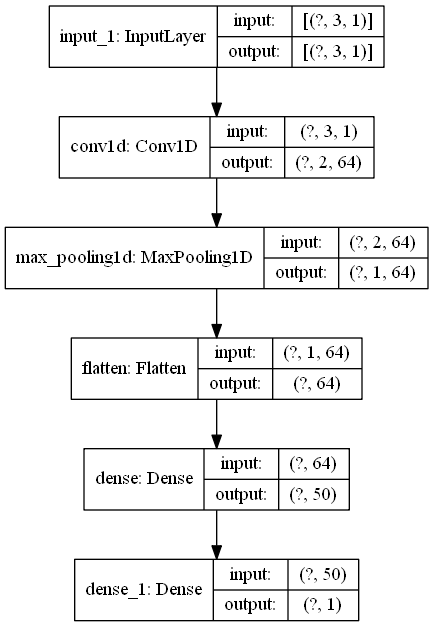

In [13]:
plot_model(model, show_shapes=True)

In [14]:
model.compile(loss='mse', optimizer='adam')

In [15]:
hist = model.fit(X, y, epochs=1000, verbose=0)

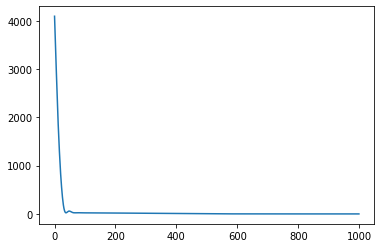

In [16]:
plt.plot(hist.history['loss'])

In [17]:
x_input = np.array([70, 80, 90])
x_input = x_input.reshape(1, n_steps, n_features)

In [18]:
x_input

array([[[70],
        [80],
        [90]]])

In [19]:
model.predict(x_input, verbose=0)

array([[101.59103]], dtype=float32)

## Exercise

In [20]:
df = pd.read_csv('./Data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [21]:
df.index.freq ='MS'

In [22]:
X, y = split_sequence(np.array(df), 12)

In [23]:
print(X.shape, y.shape)

(132, 12, 1) (132, 1)


In [24]:
X_train = X[:-12]
y_train = y[:-12]
X_test = X[-12:]
y_test = y[-12:]

In [25]:
n_steps = 12
n_features = 1

In [26]:
inputs = Input(shape=(n_steps, n_features))
x = Conv1D(filters=64, kernel_size=2, activation='relu')(inputs)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=32, kernel_size=2, activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=16, kernel_size=1, activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)

x = Flatten()(x)
x = Dense(50, activation='relu')(x)
x = Dense(1)(x)

In [27]:
model = Model(inputs, x)

In [28]:
model.summary()
model.compile(loss='mse', optimizer='adam')

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 12, 1)]           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 64)            192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4, 32)             4128      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2, 32)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2, 16)             528       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 16)            

In [29]:
hist = model.fit(X_train, y_train, epochs = 100000, callbacks = [es], verbose=0)

NameError: name 'es' is not defined

In [ ]:
plt.plot(hist.history['loss'])

In [ ]:
yhat = model.predict(X_test, verbose=0)

In [ ]:
plt.plot(yhat)
plt.plot(y_test)
plt.show()

# Multivariate CNN Models

In [ ]:
in_seq1 = np.arange(10, 100, 10)
in_seq2 = np.arange(15, 100, 10)
out_seq = np.array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

In [ ]:
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

In [ ]:
dataset = np.hstack((in_seq1, in_seq2, out_seq))

In [ ]:
dataset

In [ ]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_idx = i + n_steps
        
        if end_idx > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_idx, :-1], sequences[end_idx-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
X, y = split_sequences(dataset, 3)

In [ ]:
for i in range(len(X)):
    print(X[i], y[i])

In [ ]:
print(X.shape, y.shape)

In [ ]:
n_steps = 3
n_features = 2

In [ ]:
inputs = Input(shape=(n_steps, n_features))
x = Conv1D(filters=64, kernel_size=2, activation='relu')(inputs)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(50, activation = 'relu')(x)
x = Dense(1)(x)
model = Model(inputs, x)
model.summary()

In [ ]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
hist = model.fit(X, y, epochs = 1000, verbose=0)

In [ ]:
plt.plot(hist.history['loss'])

In [ ]:
x_input = np.array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_steps, n_features))

In [ ]:
yhat = model.predict(x_input, verbose=0)

In [ ]:
yhat

## Multi-headed CNN Model

It may offer more flexibility or better performance depending on the specifies of the problem that is being modeled.
For example, it allows you to configure each submodel differently for each input series, such as the number of filter maps and the kernel size.

In [ ]:
from tensorflow.keras.layers import concatenate

In [ ]:
n_steps = 3
n_features = 1

In [ ]:
X, y = split_sequences(dataset, n_steps)

In [ ]:
X1 = X[:, :, 0].reshape(X.shape[0], X.shape[1], n_features)
X2 = X[:, :, 1].reshape(X.shape[0], X.shape[1], n_features)

In [ ]:
X1.shape

In [ ]:
input_1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(filters=64, kernel_size=2, activation='relu')(input_1)
cnn1 = MaxPooling1D(pool_size=2)(cnn1)
cnn1 = Flatten()(cnn1)

input_2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(filters=64, kernel_size=2, activation='relu')(input_2)
cnn2 = MaxPooling1D(pool_size=2)(cnn2)
cnn2 = Flatten()(cnn2)

merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)

model = Model((input_1, input_2), output)

In [ ]:
plot_model(model)

In [ ]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
hist = model.fit([X1, X2], y, epochs = 1000, verbose=0)

In [ ]:
plt.plot(hist.history['loss'])

In [ ]:
x_input = np.array([[80, 85],[90,95],[100,105]])
x_1 = x_input[:, 0].reshape((1, n_steps, n_features))
x_2 = x_input[:, 1].reshape((1, n_steps, n_features))

In [ ]:
yhat = model.predict([x_1, x_2], verbose=0)

In [ ]:
yhat

## Multiple Parallel Series

In [ ]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_idx = i + n_steps

        if end_idx > len(sequences) - 1:
            break
        seq_x, seq_y = sequences[i:end_idx, :], sequences[end_idx, :]
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)
    

In [ ]:
n_steps = 3

In [ ]:
X, y = split_sequences(dataset, n_steps)

In [ ]:
print(X.shape, y.shape)

In [ ]:
n_features = 3

## Vactor-Output CNN Model

In [ ]:
inputs = Input(shape=(n_steps, n_features))
x = Conv1D(filters=64, kernel_size=2, activation='relu')(inputs)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(50, activation='relu')(x)
x = Dense(n_features)(x)
model = Model(inputs, x)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
hist = model.fit(X, y, epochs=1000, verbose=0)

In [ ]:
plt.plot(hist.history['loss'])

In [ ]:
x_input = np.array([[70, 75, 145], [80, 85, 165], [90,95,185]])

In [ ]:
x_input = x_input.reshape((1, n_steps, n_features))

In [ ]:
yhat = model.predict(x_input, verbose=0)

In [ ]:
yhat

## Multi-output CNN Model

In [ ]:
n_features = X.shape[2]

In [ ]:
y1 = y[:, 0].reshape((y.shape[0], 1))
y2 = y[:, 0].reshape((y.shape[0], 1))
y3 = y[:, 0].reshape((y.shape[0], 1))

In [ ]:
inputs = Input(shape=(n_steps, n_features))
c = Conv1D(filters=64, kernel_size=2, activation='relu')(inputs)
c = MaxPooling1D(pool_size=2)(c)
c = Flatten()(c)
c = Dense(50, activation='relu')(c)
output1 = Dense(1)(c)
output2 = Dense(1)(c)
output3 = Dense(1)(c)
model = Model(inputs, [output1, output2, output3])

In [ ]:
plot_model(model)

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
hist = model.fit(X, [y1,y2,y3], epochs=1000, verbose=0)

In [ ]:
plt.plot(hist.history['loss'])

In [ ]:
x_input = np.array([[70,75,145],[80,85,165],[90,95,185]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

In [ ]:
yhat

# Multi-step CNN Models

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
seq = np.arange(10,100,10)

In [33]:
seq

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

Use three time steps(10, 20, 30) as a input and forecast the next two steps(40, 50)

In [34]:
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_idx = i + n_steps_in
        out_end_idx = end_idx + n_steps_out
        
        if out_end_idx > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx:out_end_idx]
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)

In [36]:
X, y = split_sequence(seq, 3, 2)

In [39]:
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] [40 50]
[20 30 40] [50 60]
[30 40 50] [60 70]
[40 50 60] [70 80]
[50 60 70] [80 90]


## Vector Output Model

Reshape from [samples, timesteps] into [samples, timesteps, features]

In [53]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [48]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [49]:
X.shape

(5, 3, 1)

In [51]:
inputs = Input(shape=(X.shape[1], X.shape[2]))
x = Conv1D(filters=64, kernel_size=2, activation='relu')(inputs)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(50, activation='relu')(x)
x = Dense(y.shape[1])(x)

model = Model(inputs, x)

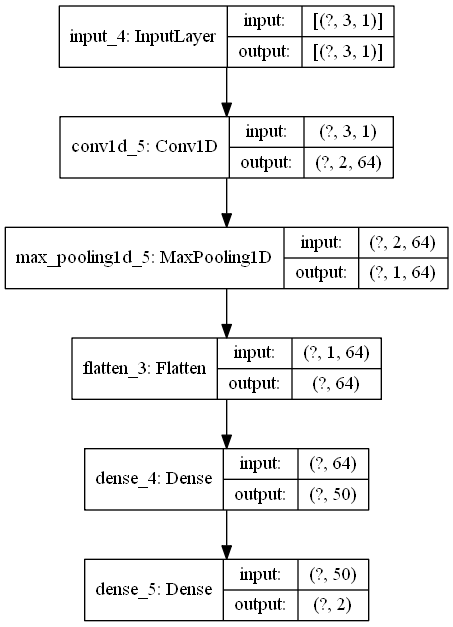

In [55]:
plot_model(model, show_shapes=True)

In [59]:
model.compile(loss='mse', optimizer='adam')

In [60]:
es = EarlyStopping(monitor='loss', patience=10)

In [61]:
hist = model.fit(X, y, epochs = 1000, verbose=0, callbacks=[es])

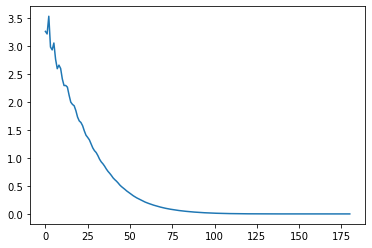

In [62]:
plt.plot(hist.history['loss'])

In [64]:
x_input = np.array([70, 80, 90])
x_input = x_input.reshape((1, 3, 1))

In [66]:
yhat = model.predict(x_input, verbose=0)

In [67]:
yhat

array([[102.21799, 113.71067]], dtype=float32)

# Multivariate Multi-step CNN Models

In [73]:
in_seq1 = np.arange(10, 100, 10)
in_seq2 = np.arange(15, 100, 10)
out_seq = np.array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

In [75]:
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

In [77]:
n_steps_in, n_steps_out = 3, 2

In [79]:
dataset = np.hstack((in_seq1, in_seq2, out_seq))

In [85]:
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_idx = i + n_steps_in
        out_end_idx = end_idx + n_steps_out -1
        if out_end_idx > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_idx, :-1], sequences[end_idx-1:out_end_idx, -1]
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)

In [86]:
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

In [89]:
for i in range(len(X)):
    print(X[i], y[i])

[[10 15]
 [20 25]
 [30 35]] [65 85]
[[20 25]
 [30 35]
 [40 45]] [ 85 105]
[[30 35]
 [40 45]
 [50 55]] [105 125]
[[40 45]
 [50 55]
 [60 65]] [125 145]
[[50 55]
 [60 65]
 [70 75]] [145 165]
[[60 65]
 [70 75]
 [80 85]] [165 185]


In [94]:
inputs = Input(shape=(X.shape[1],X.shape[2]))
x = Conv1D(filters=64, kernel_size=2, activation='relu')(inputs)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(50, activation='relu')(x)
x = Dense(n_steps_out)(x)
model = Model(inputs, x)
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 3, 2)]            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 2, 64)             320       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                3250      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 102       
Total params: 3,672
Trainable params: 3,672
Non-trainable params: 0
____________________________________________________

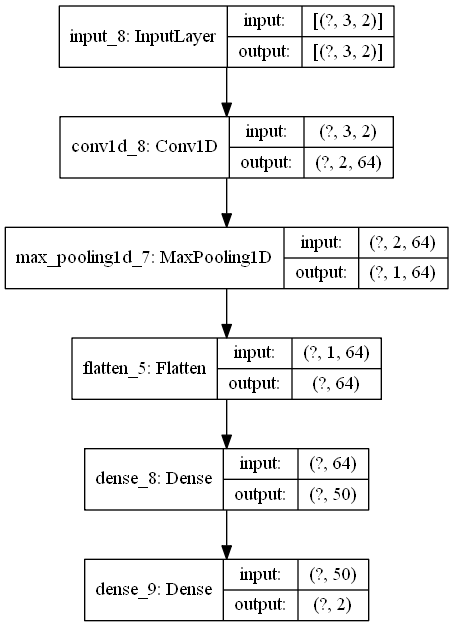

In [96]:
plot_model(model, show_shapes=True)

In [101]:
model.compile(loss='mse', optimizer='adam')

In [102]:
hist = model.fit(X, y, epochs = 1000, callbacks=[es], verbose=0)

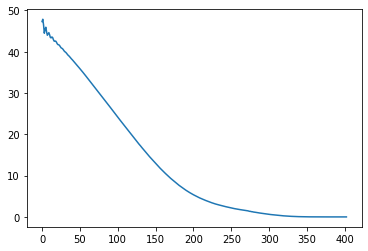

In [103]:
plt.plot(hist.history['loss'])

In [107]:
x_input = np.array([[70, 75], [80, 85], [90, 95]])
x_input = x_input.reshape(1, -1, 2)

In [108]:
yhat = model.predict(x_input, verbose=0)

In [109]:
yhat

array([[185.1395 , 205.84134]], dtype=float32)

## Multiple Parallel Input and Multi-step Output

In [124]:
in_seq1 = np.arange(10, 100, 10)
in_seq2 = np.arange(15, 100, 10)
out_seq = np.array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

In [128]:
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

In [129]:
dataset = np.hstack((in_seq1, in_seq2, out_seq))

In [134]:
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_idx = i + n_steps_in
        out_end_idx = end_idx + n_steps_out
        
        if out_end_idx > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_idx, :], sequences[end_idx:out_end_idx, :]
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [135]:
X, y = split_sequences(dataset, 3, 2)

In [137]:
n_features = X.shape[2]

In [161]:
n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))

In [162]:
y

array([[ 40,  45,  85,  50,  55, 105],
       [ 50,  55, 105,  60,  65, 125],
       [ 60,  65, 125,  70,  75, 145],
       [ 70,  75, 145,  80,  85, 165],
       [ 80,  85, 165,  90,  95, 185]])

In [172]:
inputs = Input(shape=(X.shape[1], X.shape[2]))
x = Conv1D(filters=64, kernel_size=2, activation='relu')(inputs)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(50, activation='relu')(x)
x = Dense(n_output)(x)
model = Model(inputs, x)

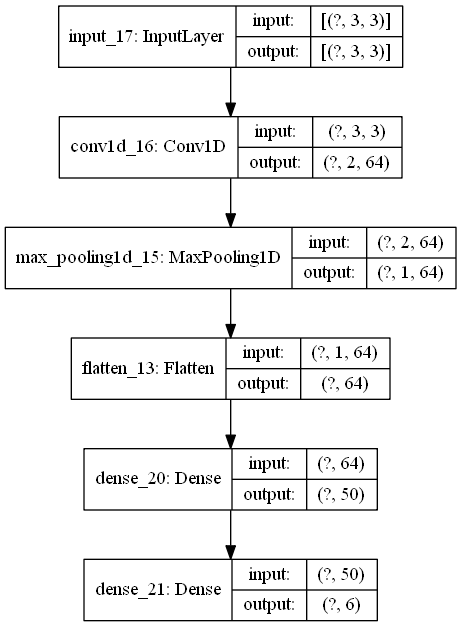

In [173]:
plot_model(model, show_shapes=True)

In [174]:
model.compile(loss='mse', optimizer='adam')

In [175]:
history = model.fit(X, y, epochs = 1000, callbacks = [es], verbose=0)

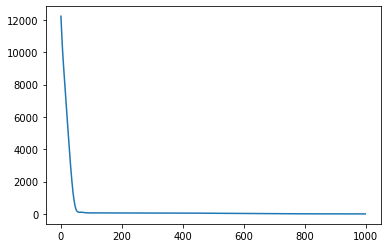

In [178]:
plt.plot(history.history['loss'])

In [180]:
x_input = np.array([[60, 65, 125], [70, 75, 145], [80, 85, 165]])

In [182]:
x_input = x_input.reshape(1, 3, 3)

In [184]:
yhat = model.predict(x_input, verbose=0)

In [185]:
yhat

array([[ 90.19159 ,  95.3523  , 189.20834 , 100.276436, 105.86392 ,
        209.7315  ]], dtype=float32)